<a href="https://colab.research.google.com/github/payaldas30/Impulse-NITK/blob/main/BasicAnalysisEEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import numpy as np
def compute_metrics(signal):
    mean = np.mean(signal)
    zcr = ((signal[:-1] * signal[1:]) < 0).sum() / len(signal)
    signal_range = np.max(signal) - np.min(signal)
    energy = np.sum(np.square(signal))
    rms = np.sqrt(np.mean(np.square(signal)))
    variance = np.var(signal)

    return mean, zcr, signal_range, energy, rms, variance

In [4]:
train_data_folder = "/content/drive/MyDrive/Impulse/EEG_Data/train_data"
classes = os.listdir(train_data_folder)
selected_files = [os.path.join(train_data_folder, cls, os.listdir(os.path.join(train_data_folder, cls))[0]) for cls in classes]

Loaded file: /content/drive/MyDrive/Impulse/EEG_Data/train_data/Complex_Partial_Seizures/1867.npy, Shape: (19, 500)


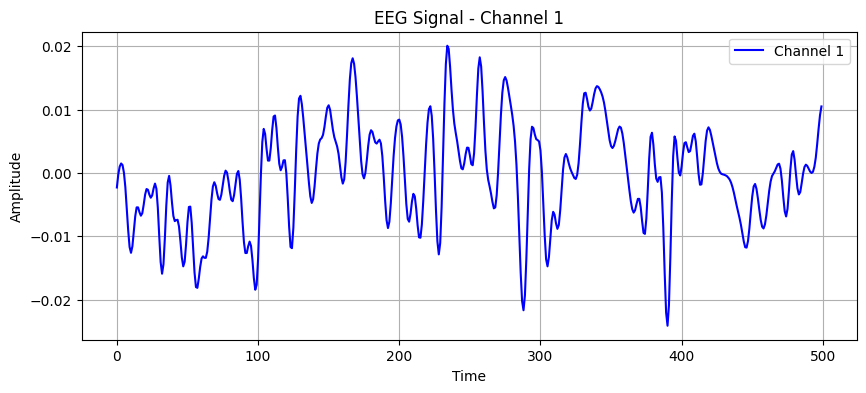

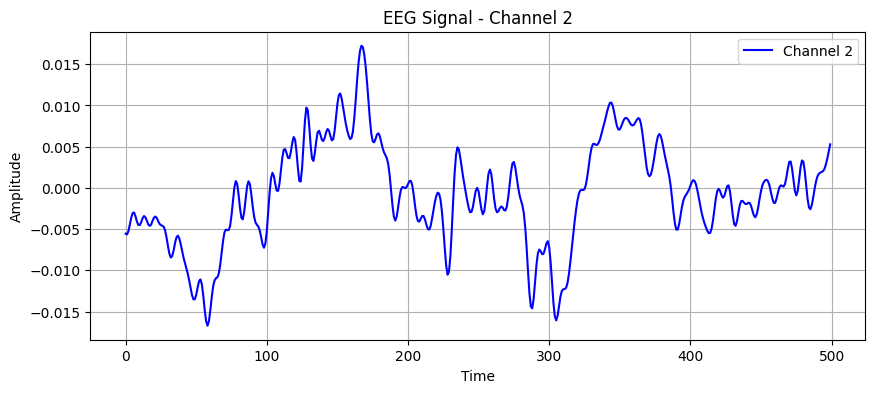

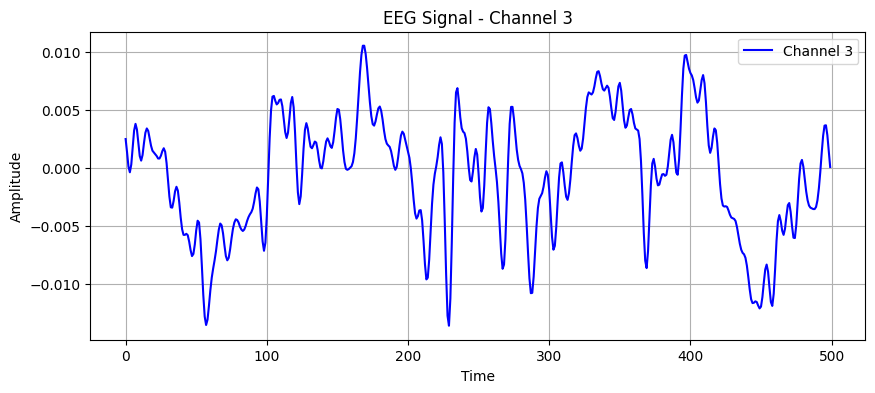

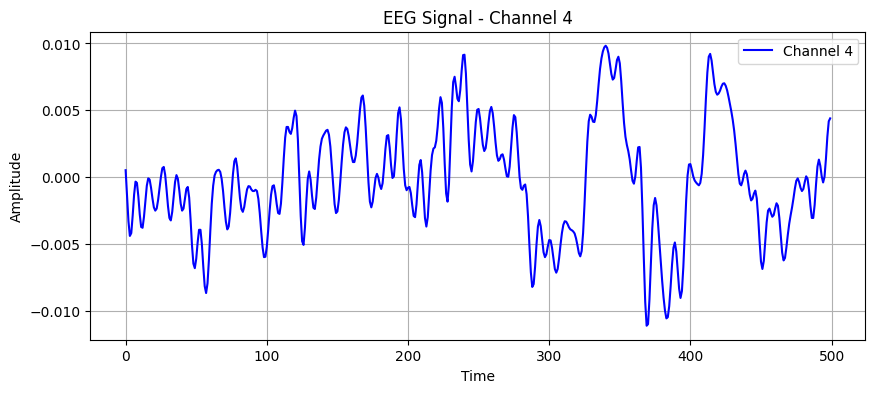

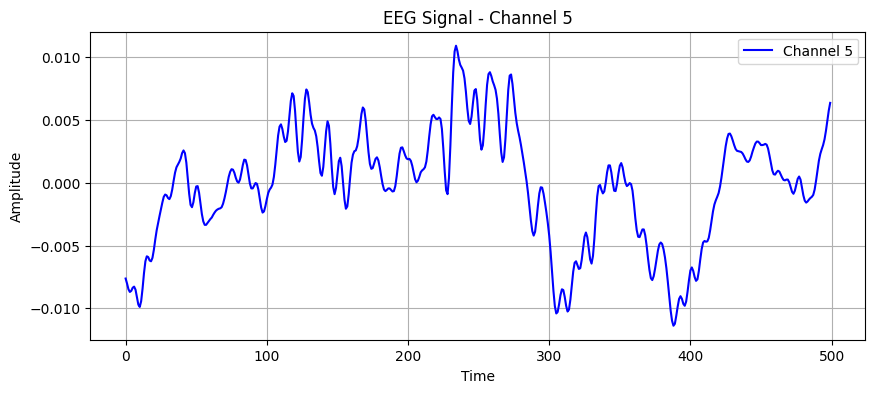

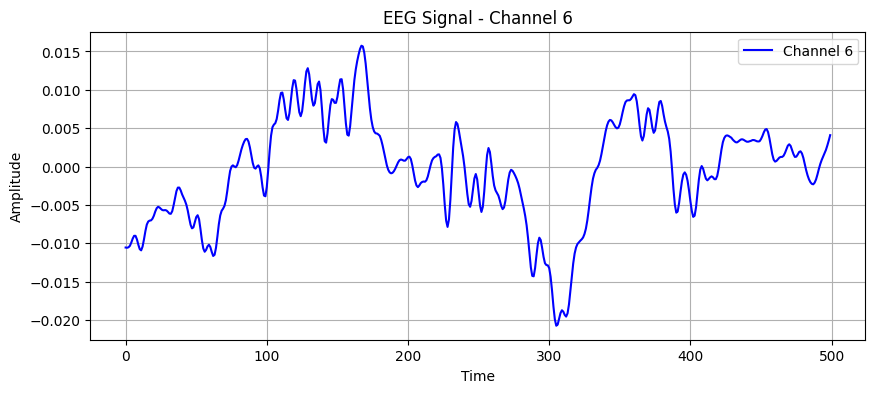

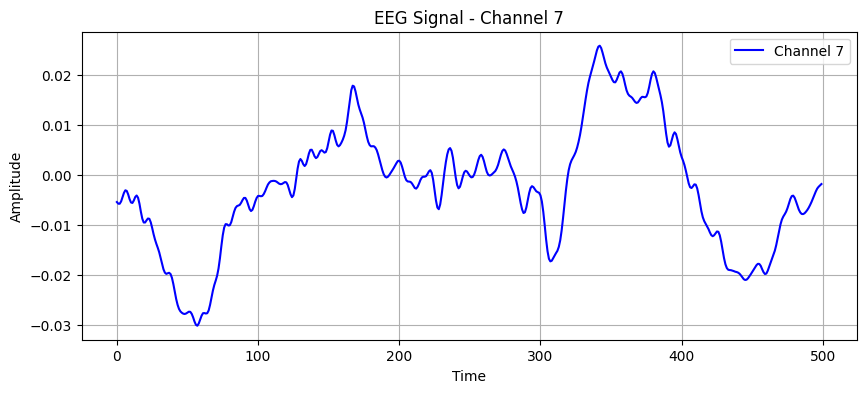

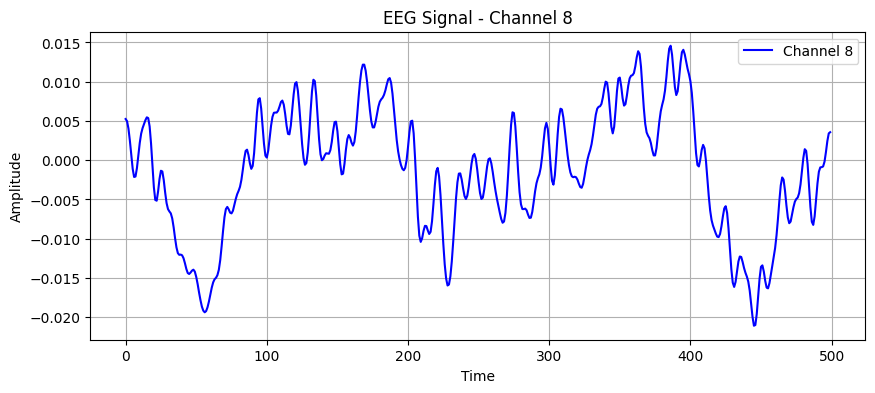

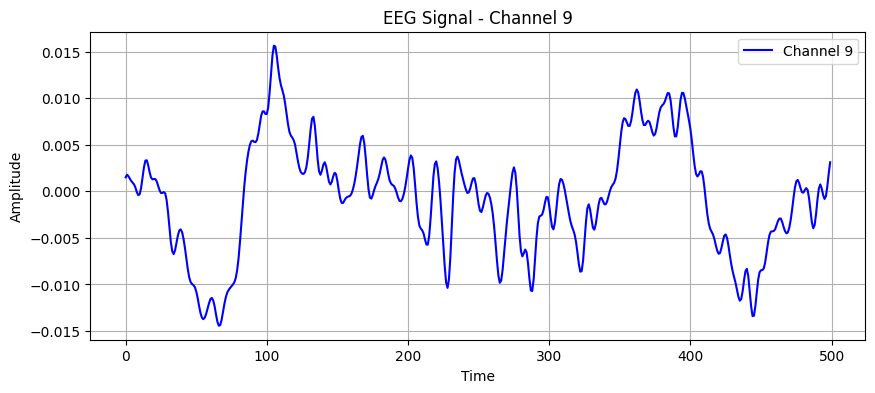

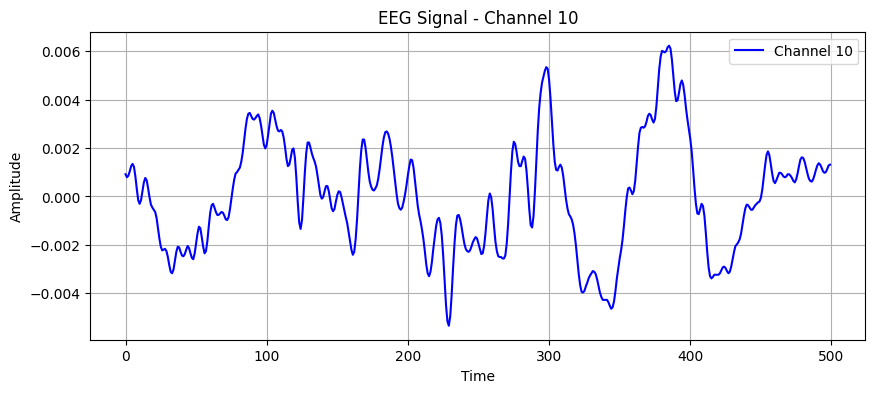

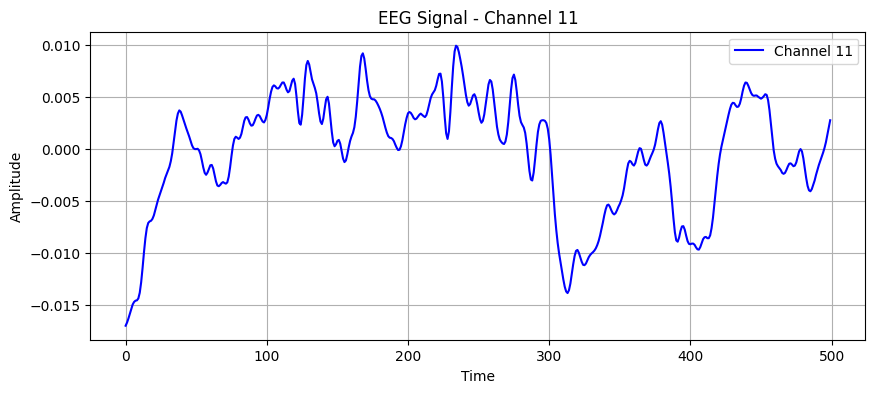

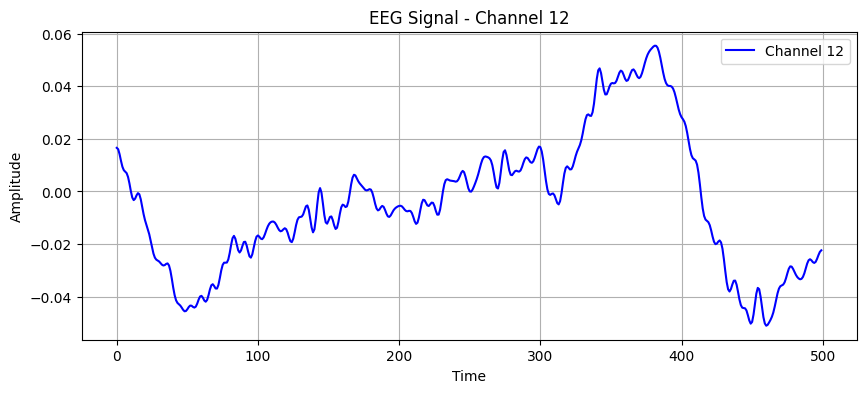

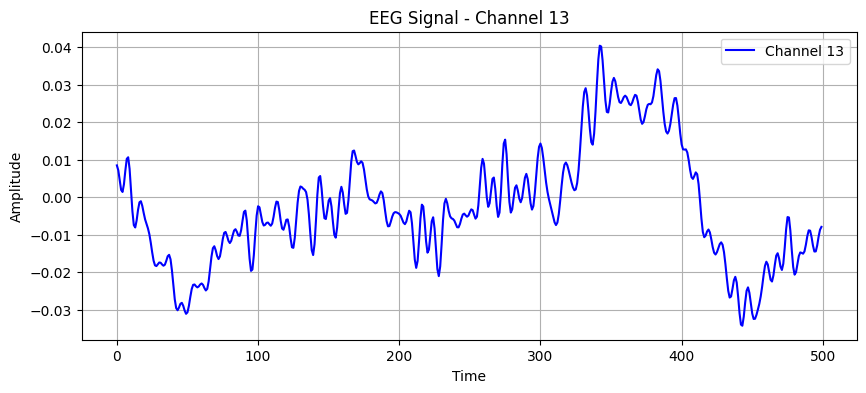

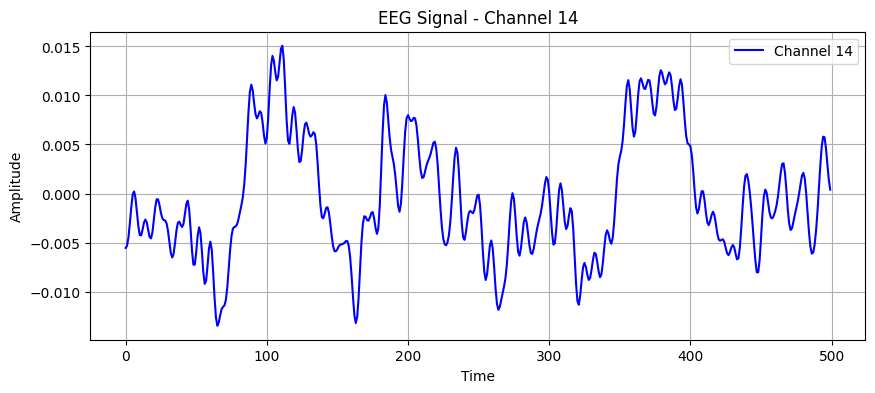

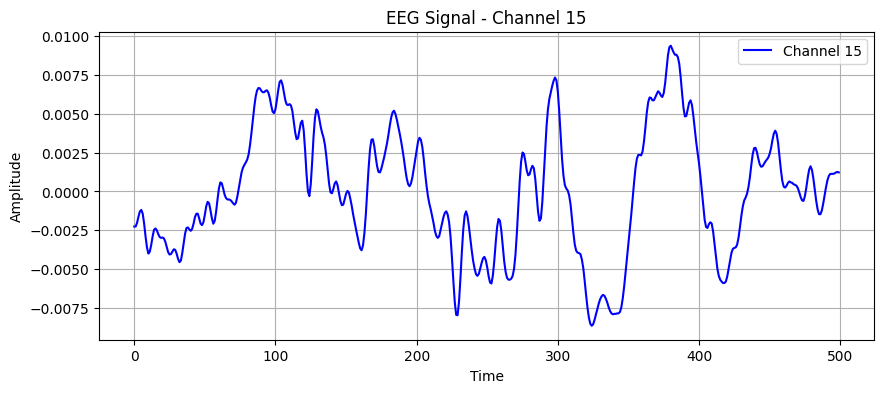

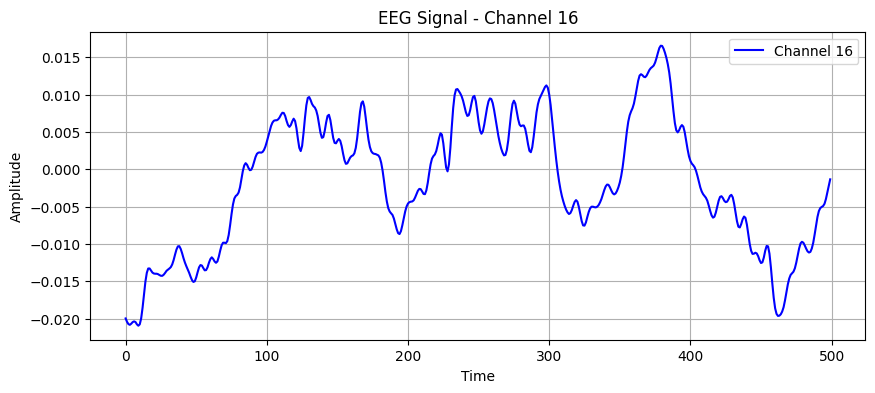

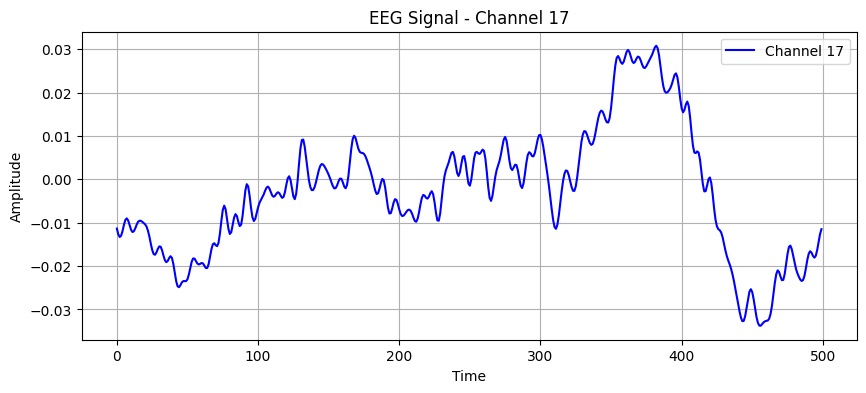

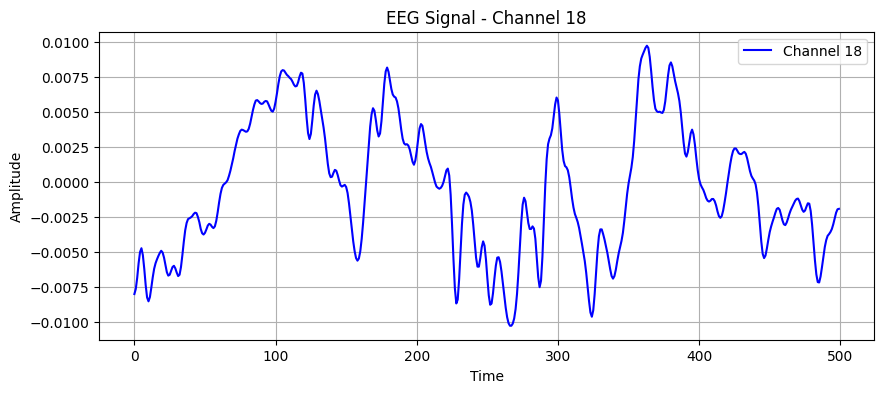

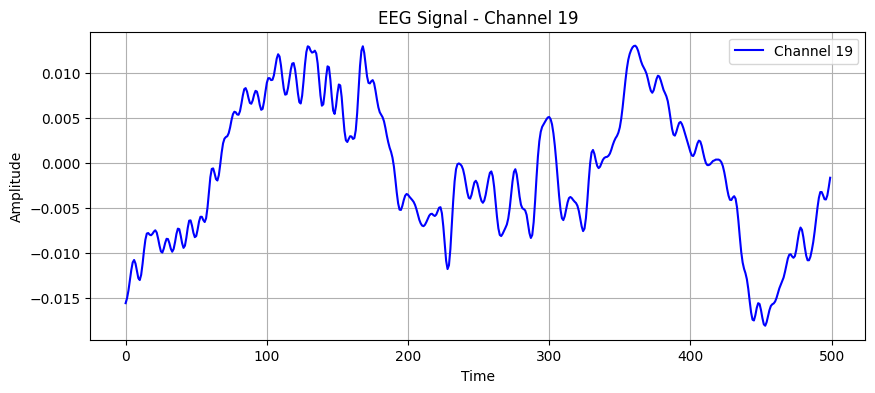

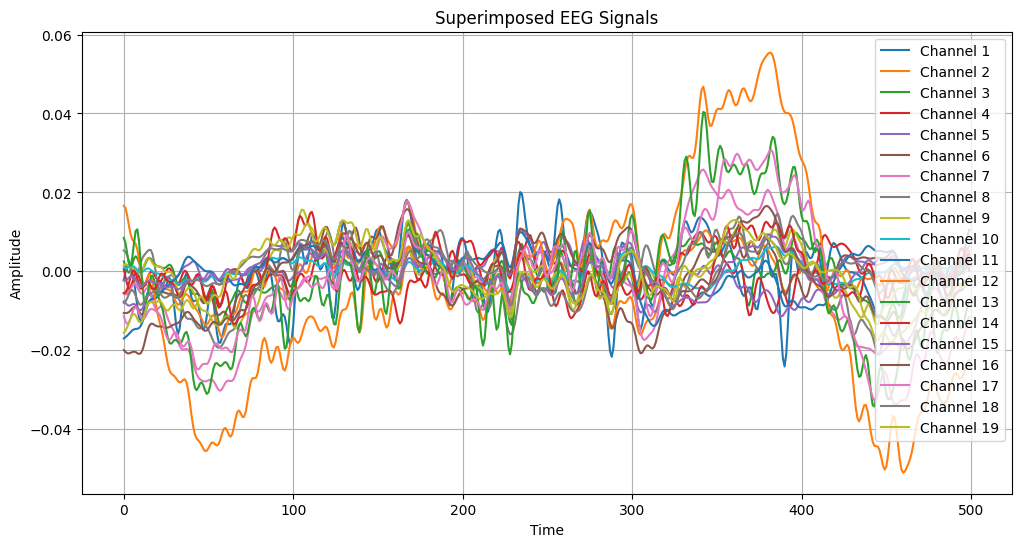

Loaded file: /content/drive/MyDrive/Impulse/EEG_Data/train_data/Electrographic_Seizures/4520.npy, Shape: (19, 500)


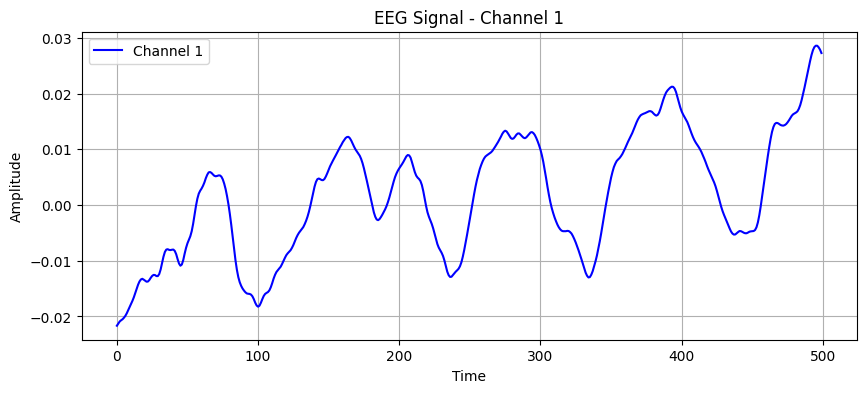

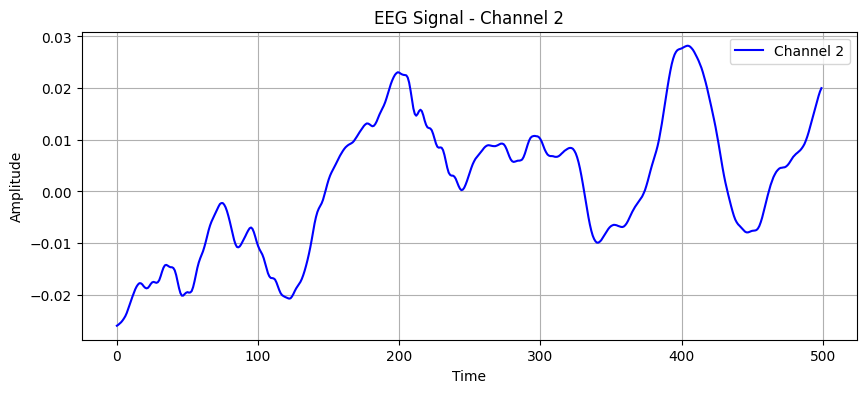

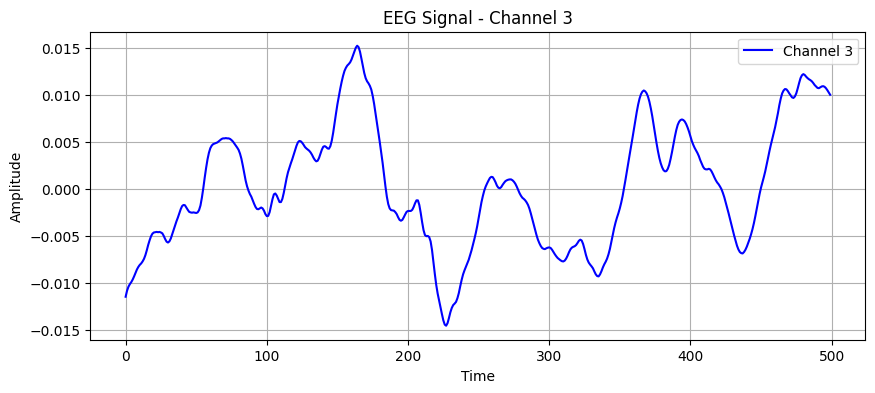

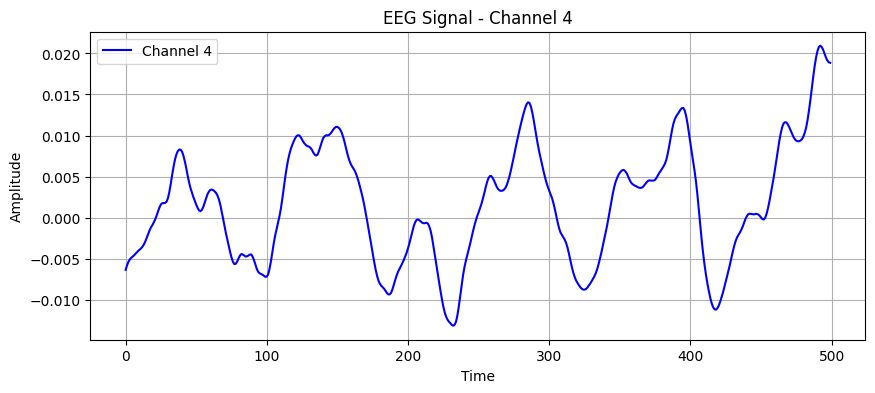

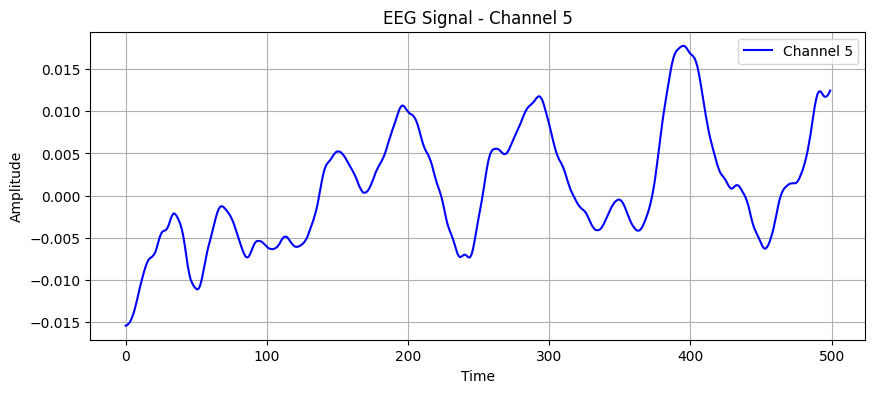

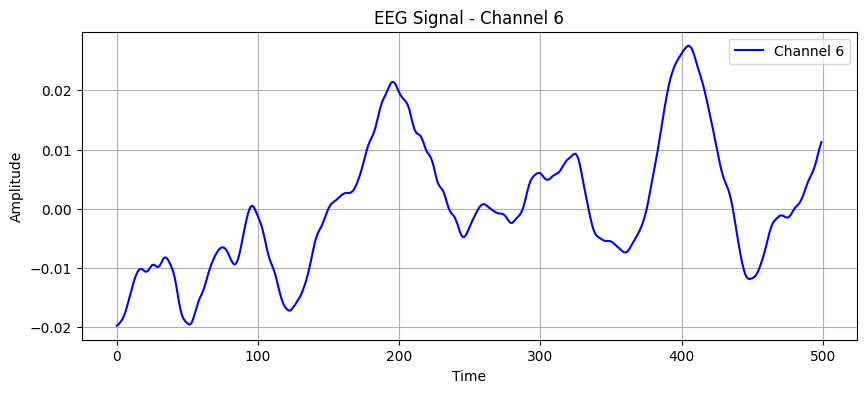

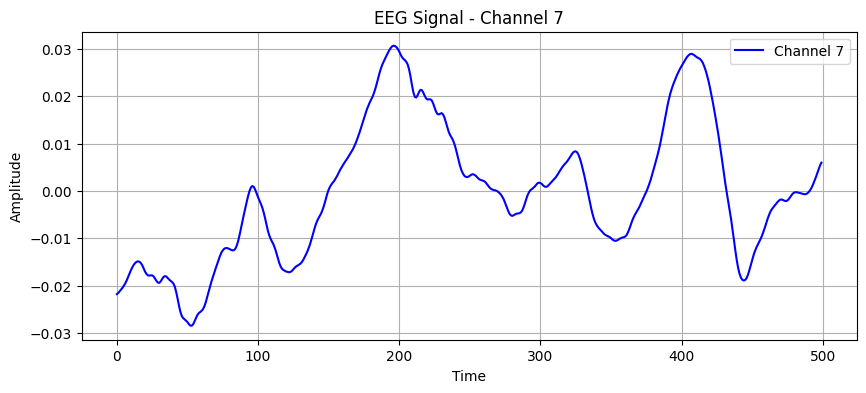

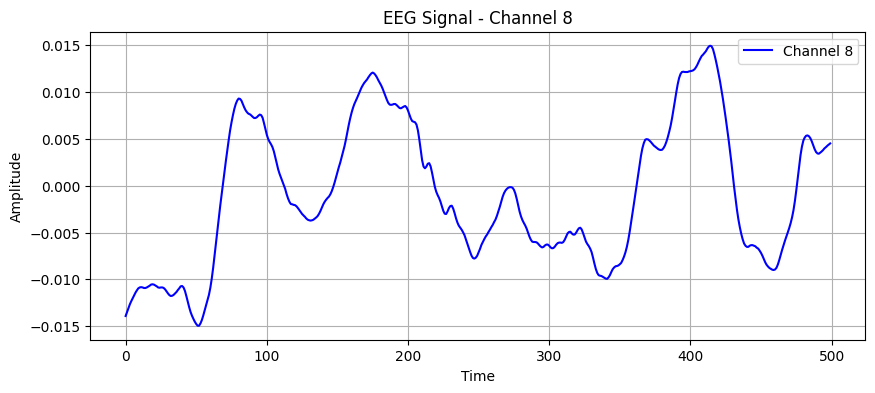

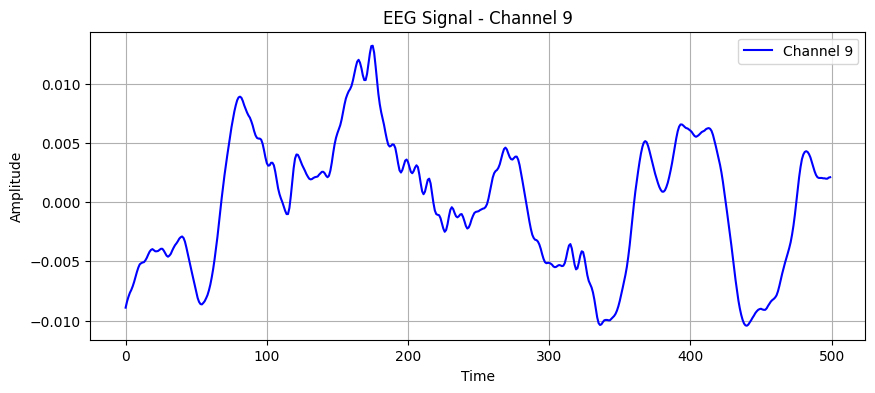

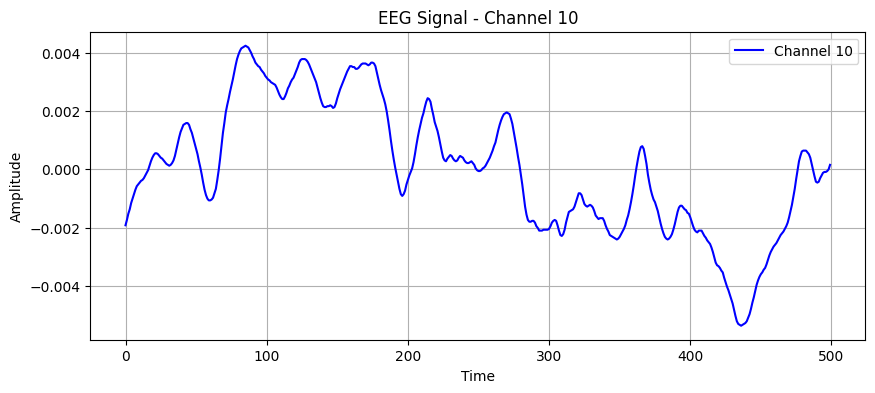

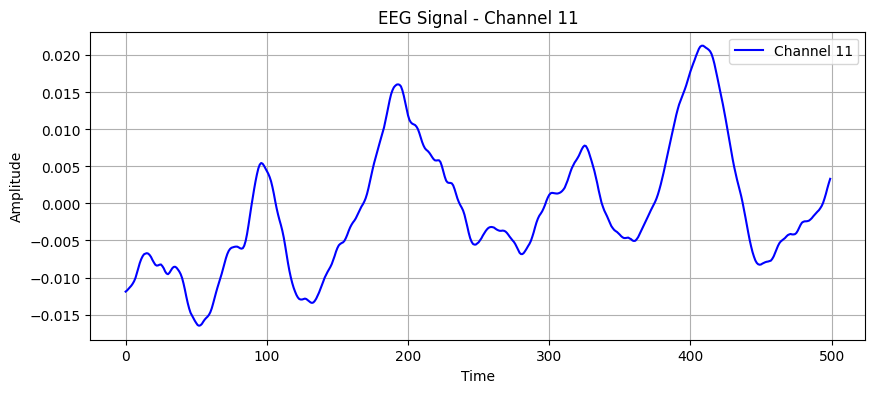

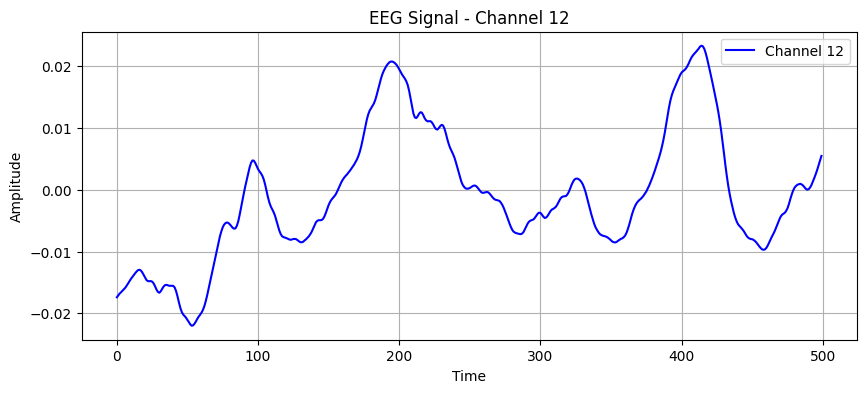

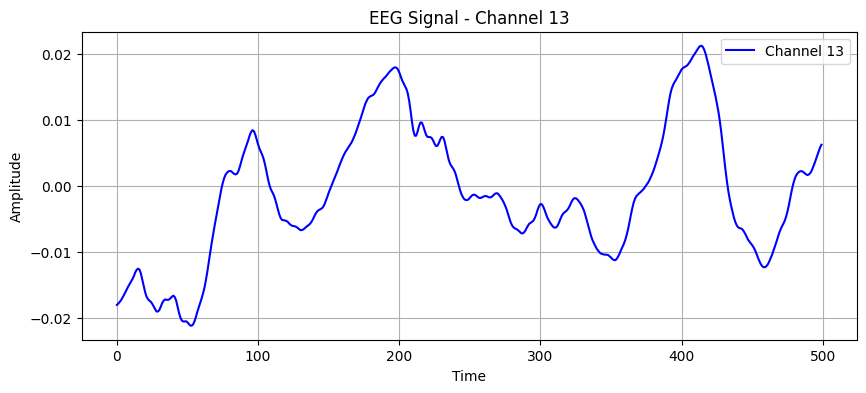

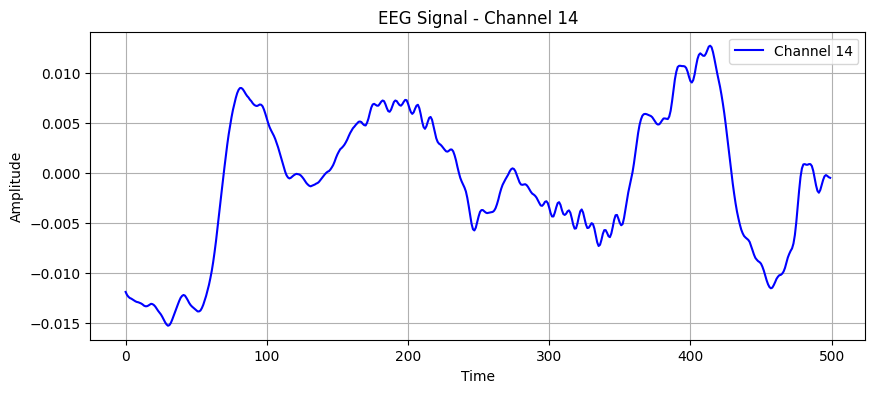

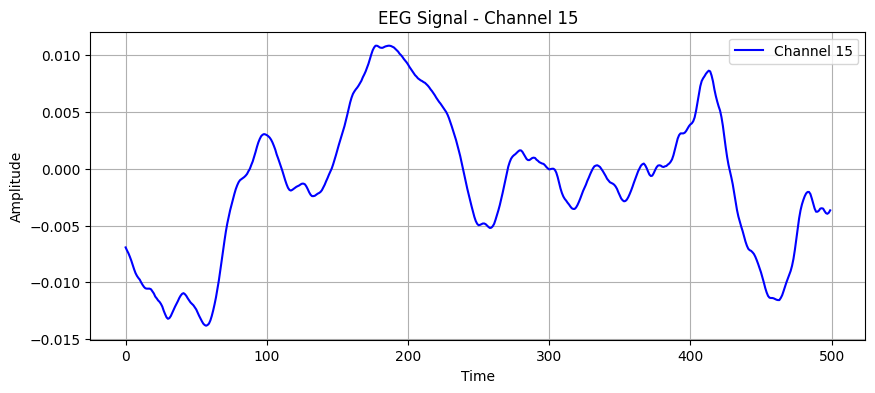

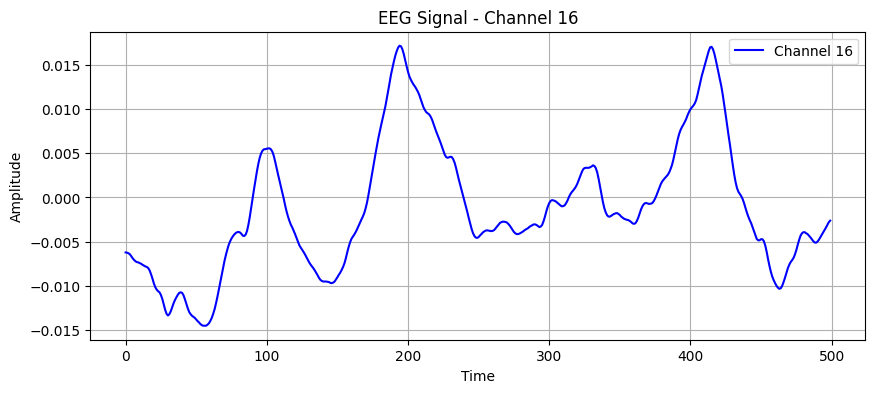

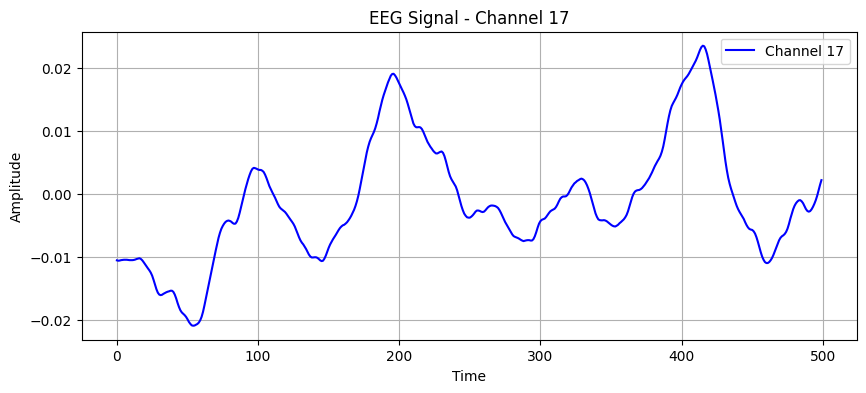

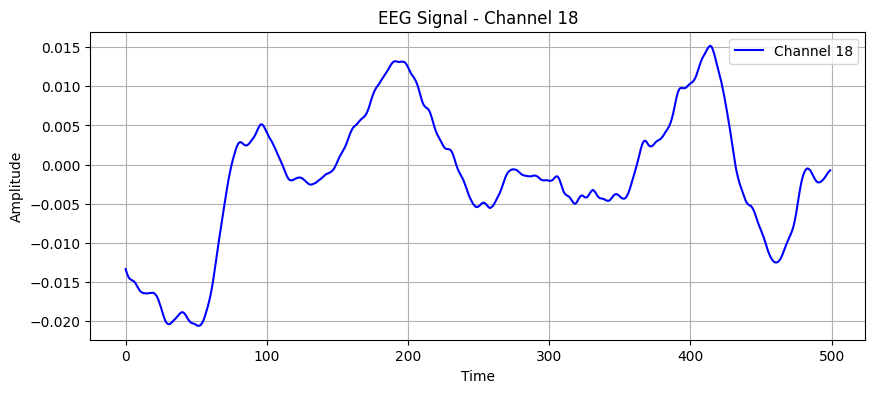

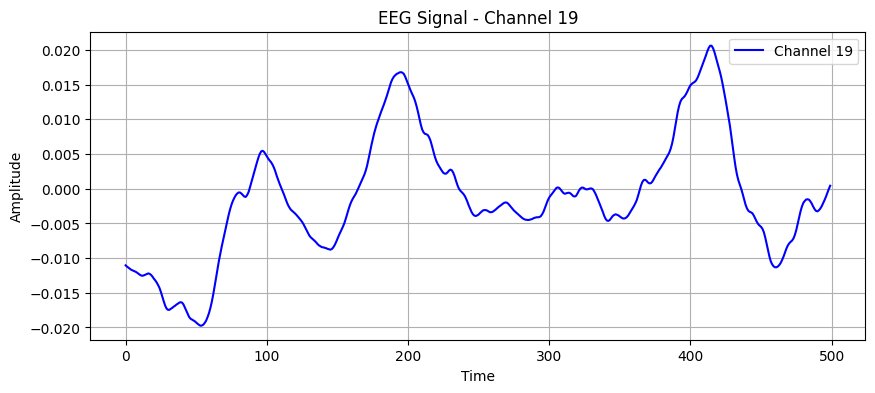

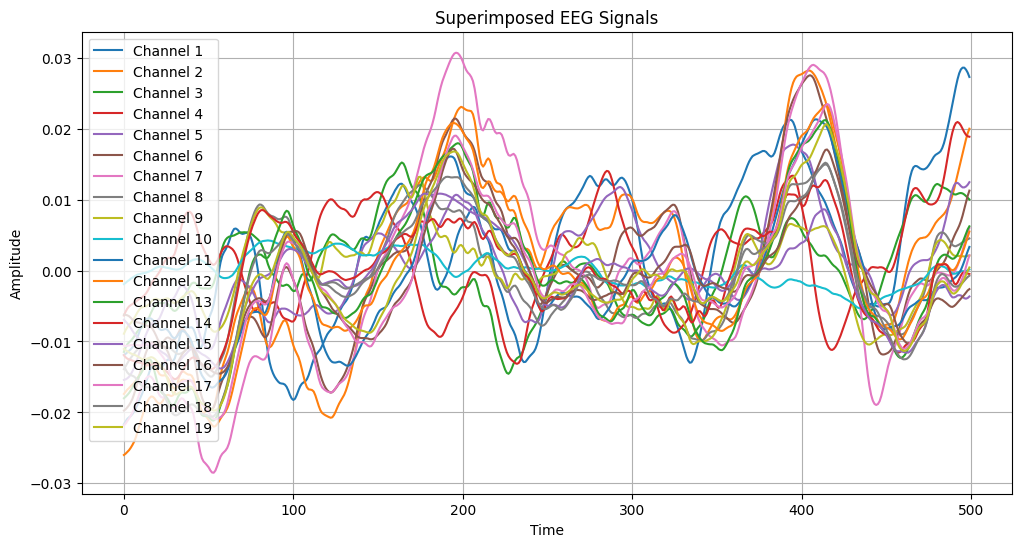

Loaded file: /content/drive/MyDrive/Impulse/EEG_Data/train_data/Normal/5540.npy, Shape: (19, 500)


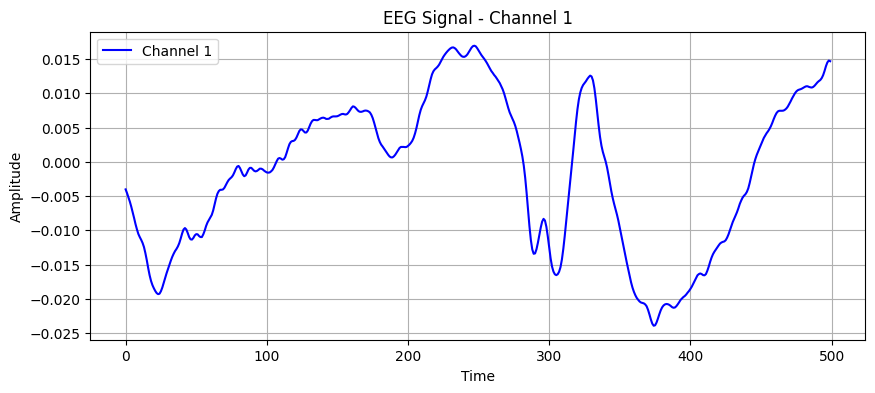

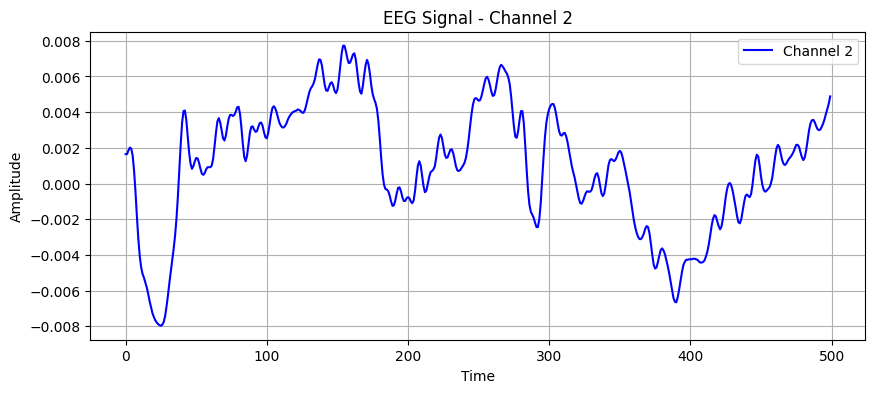

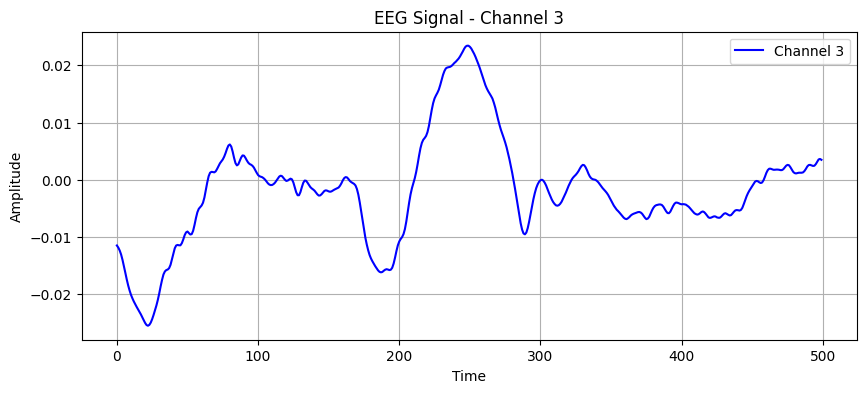

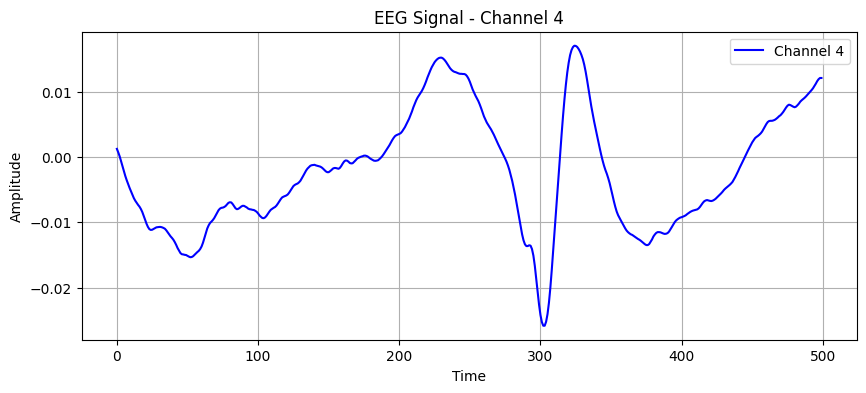

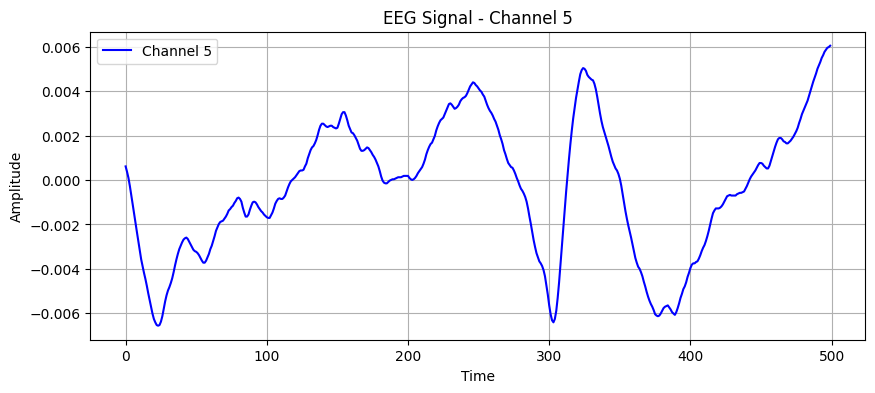

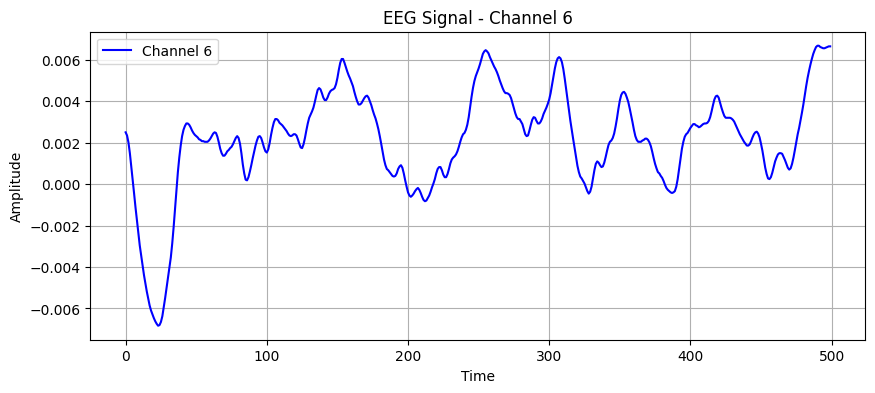

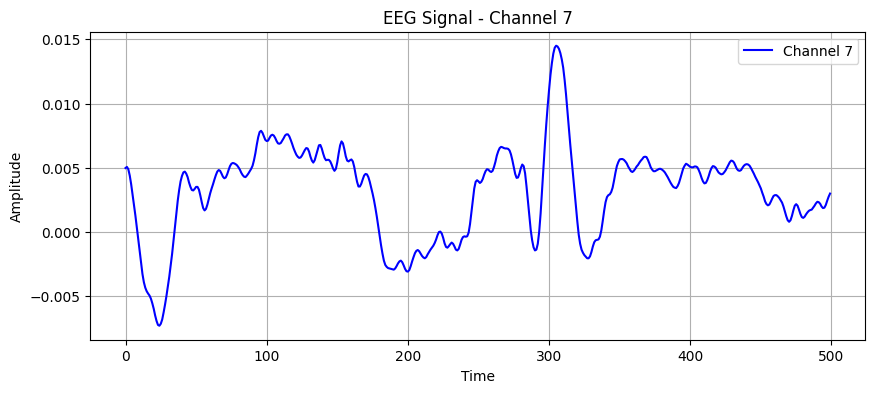

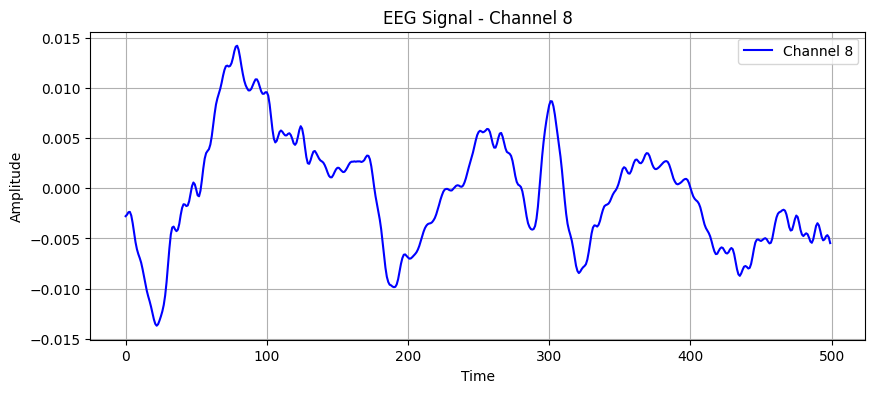

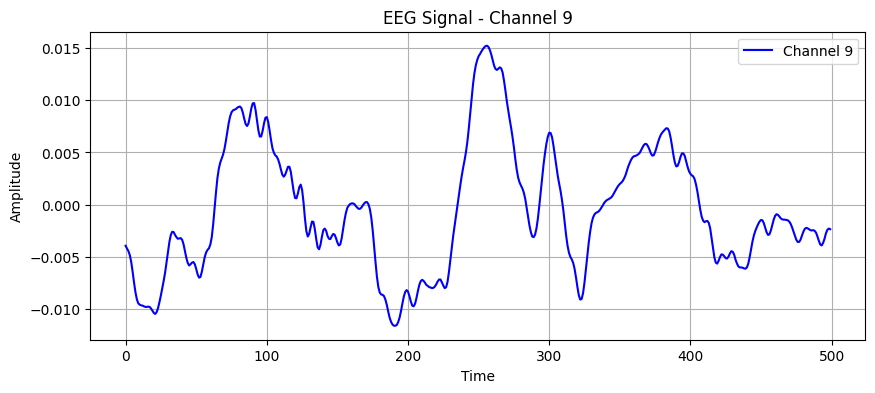

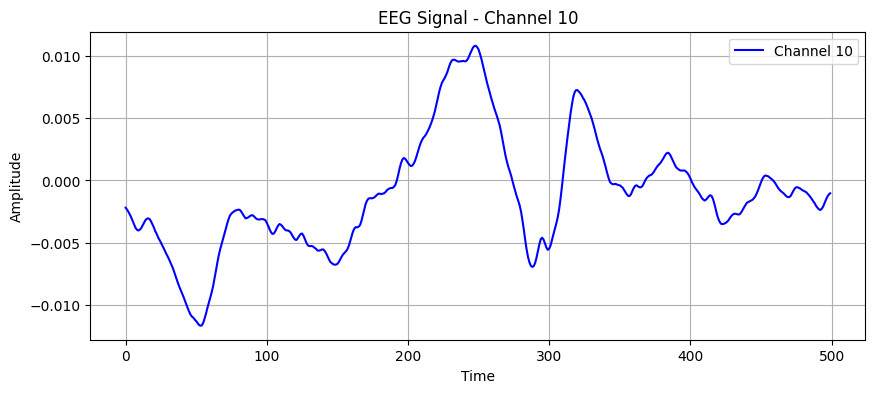

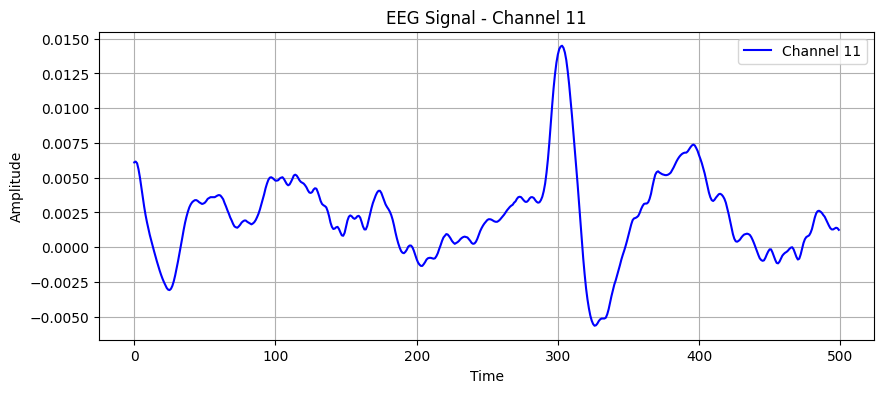

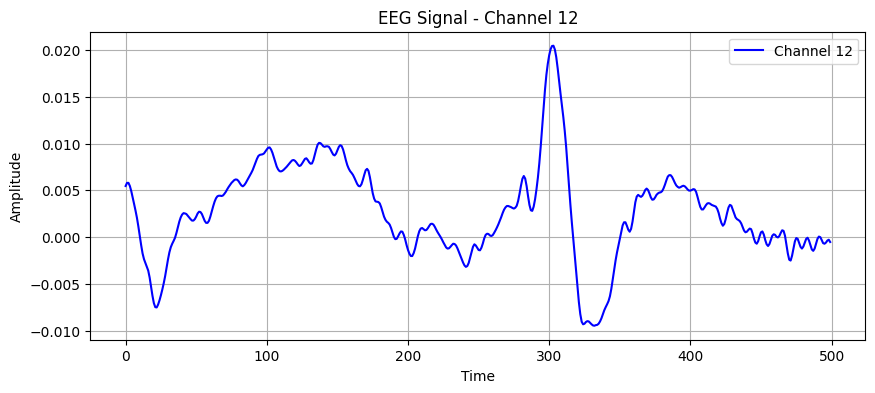

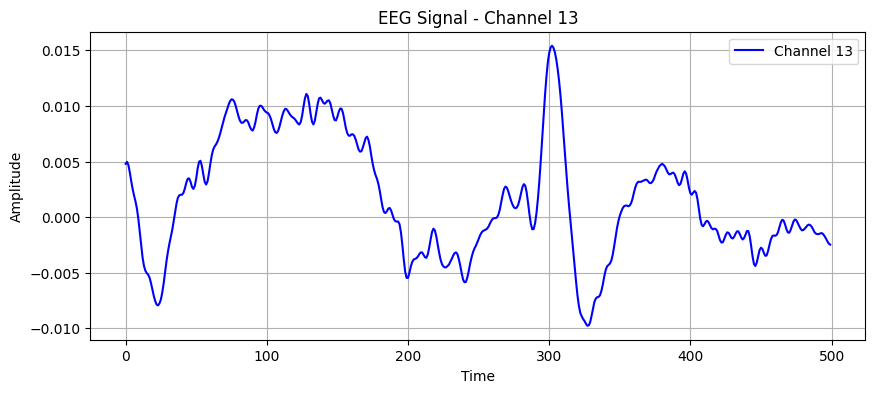

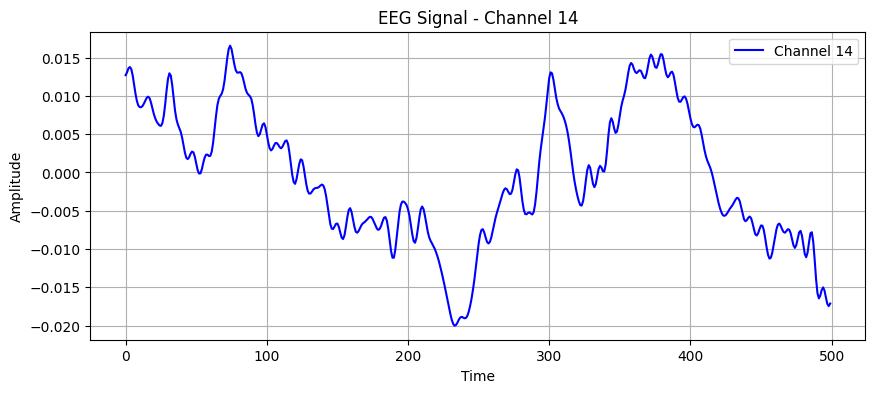

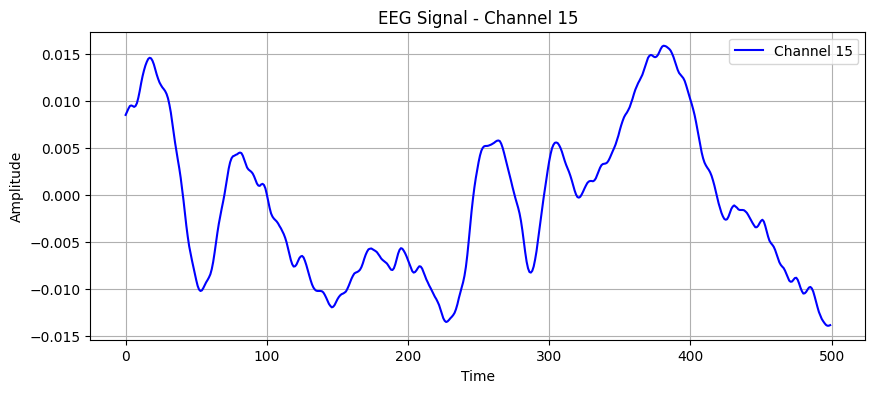

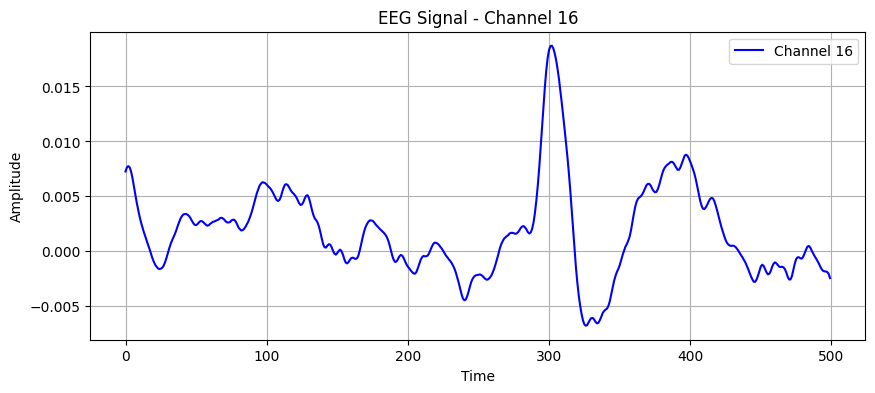

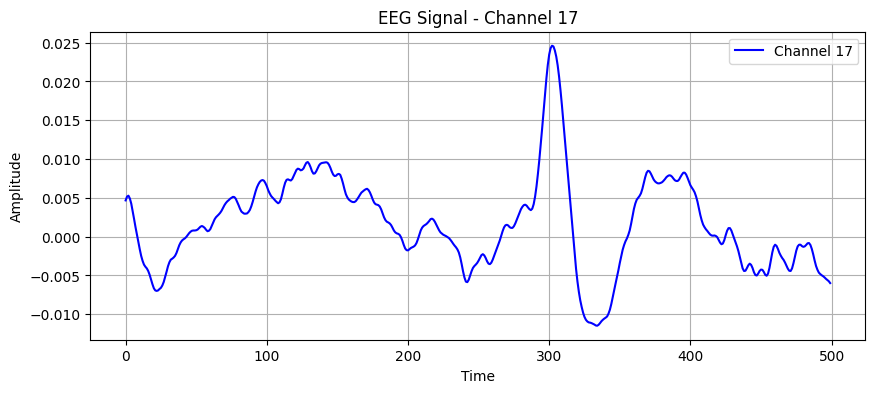

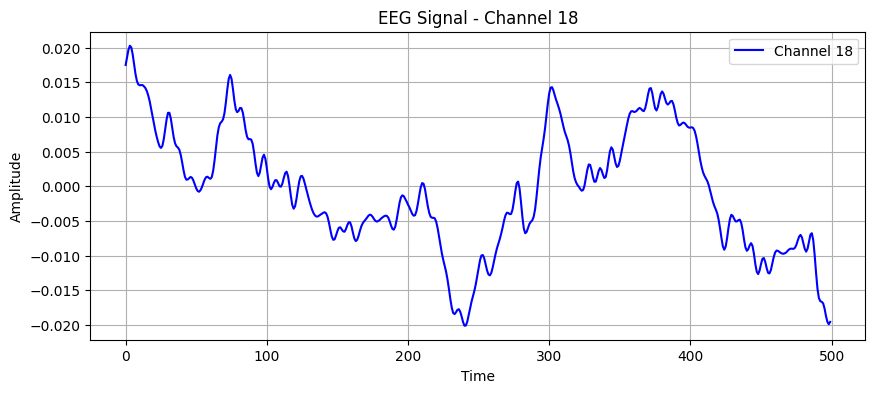

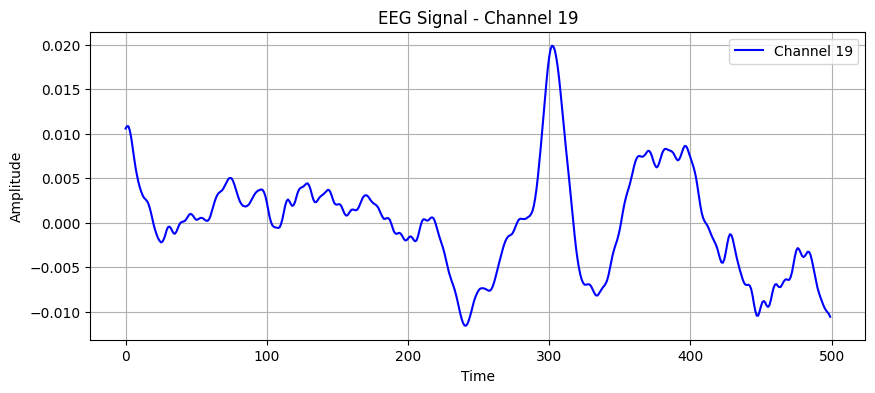

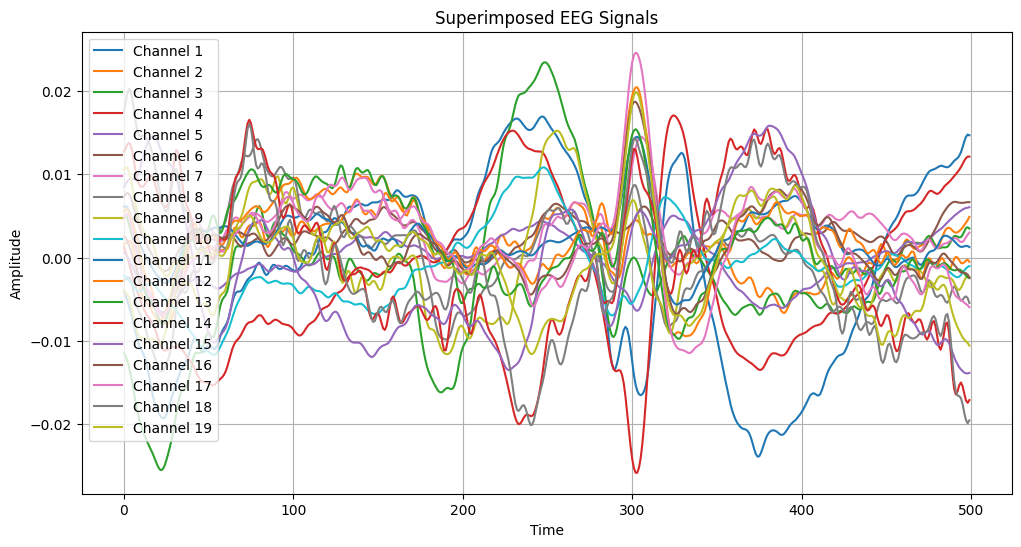

Loaded file: /content/drive/MyDrive/Impulse/EEG_Data/train_data/Video_detected_Seizures_with_no_visual_change_over_EEG/3526.npy, Shape: (19, 500)


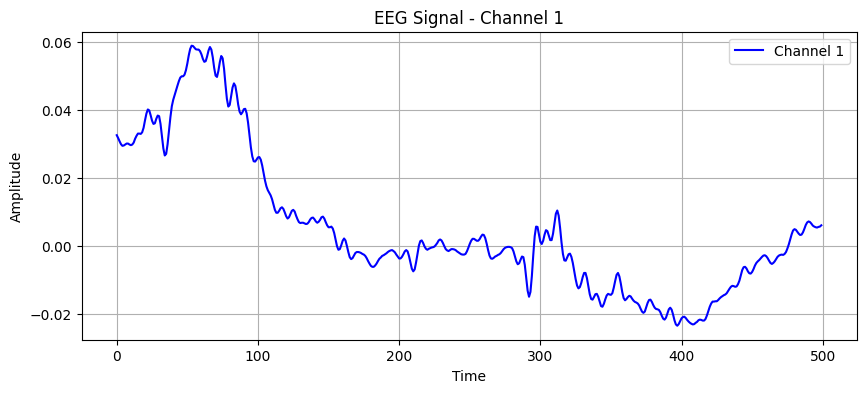

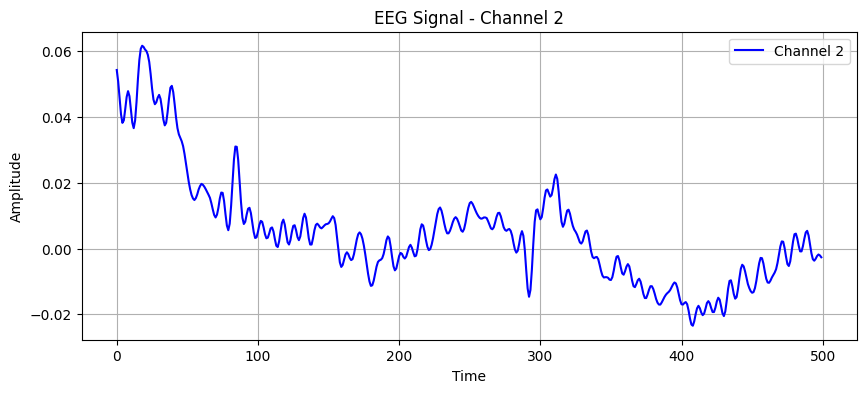

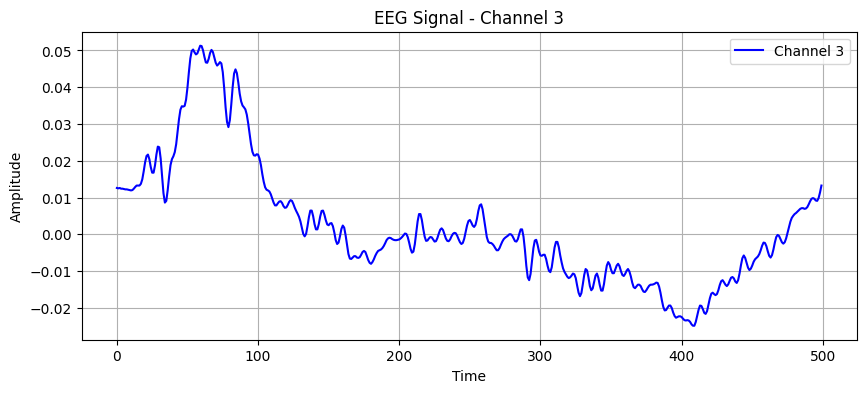

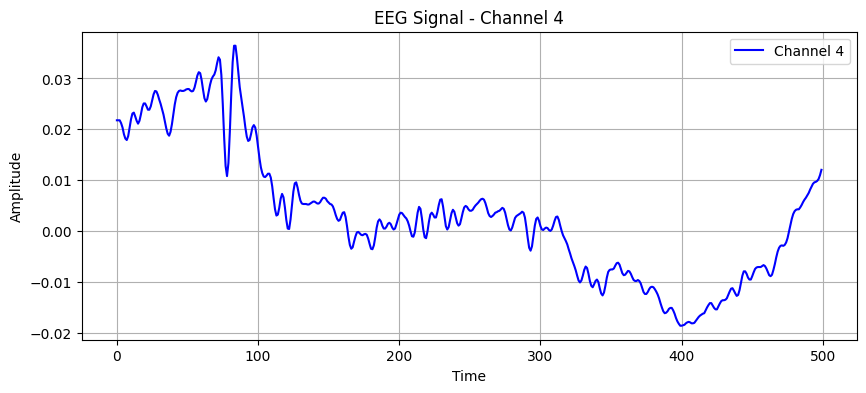

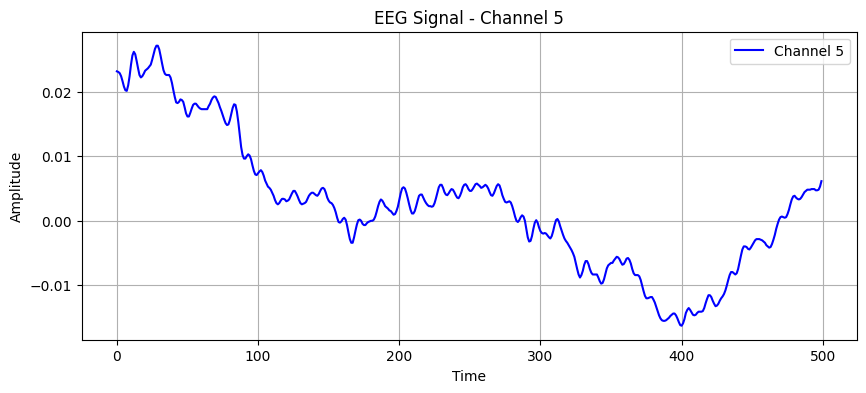

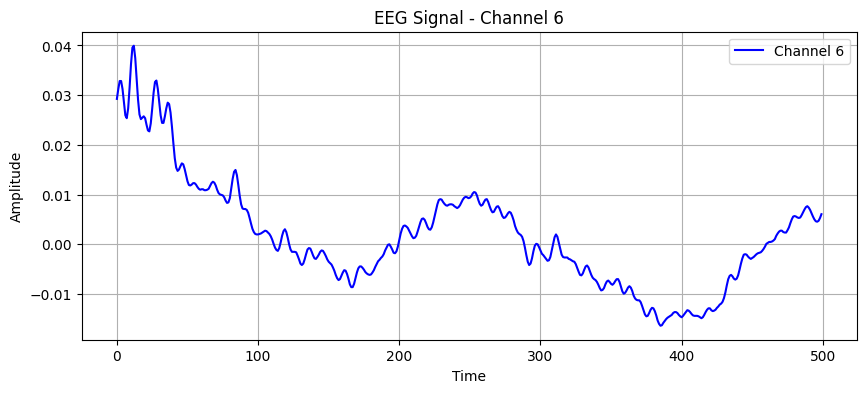

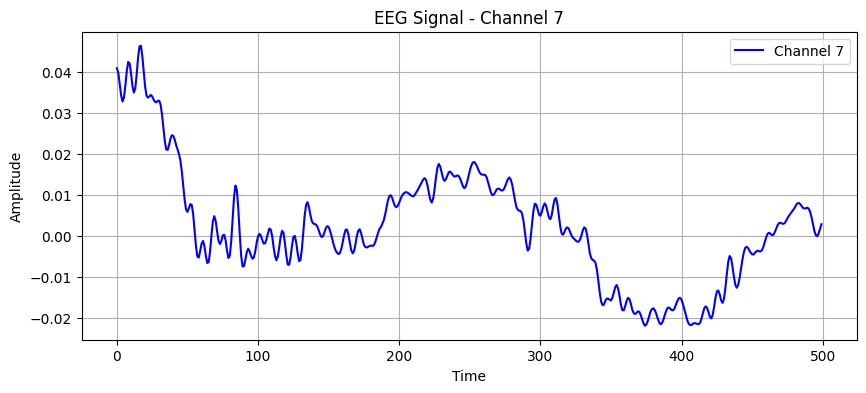

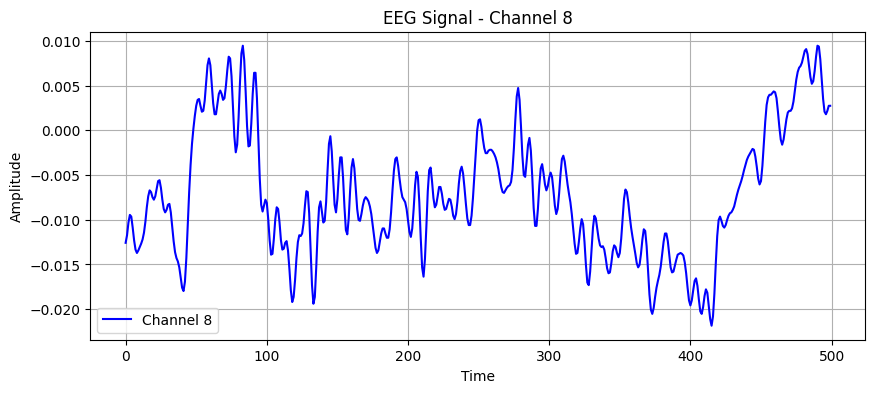

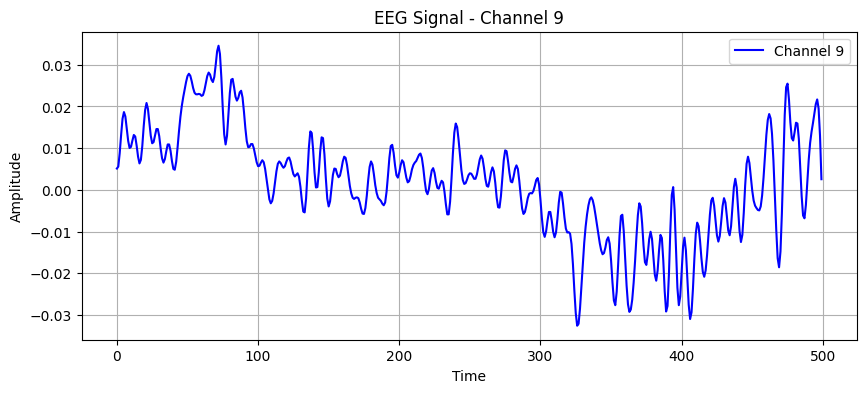

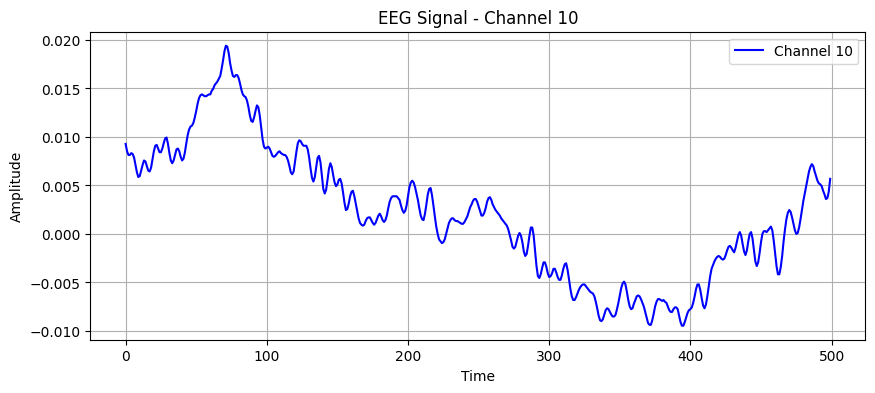

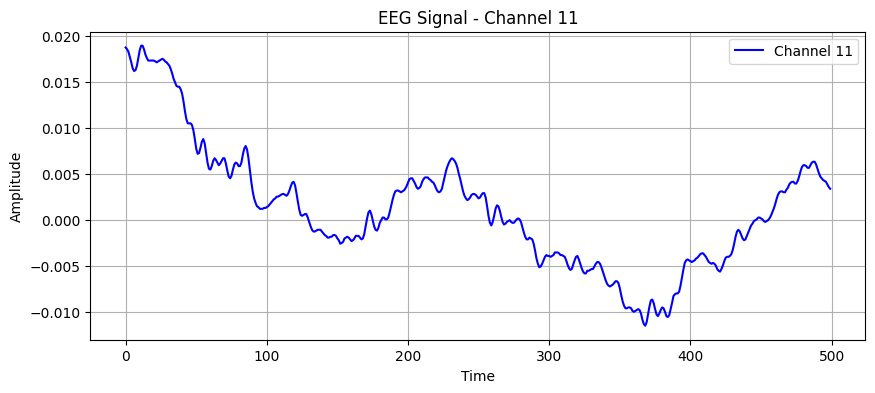

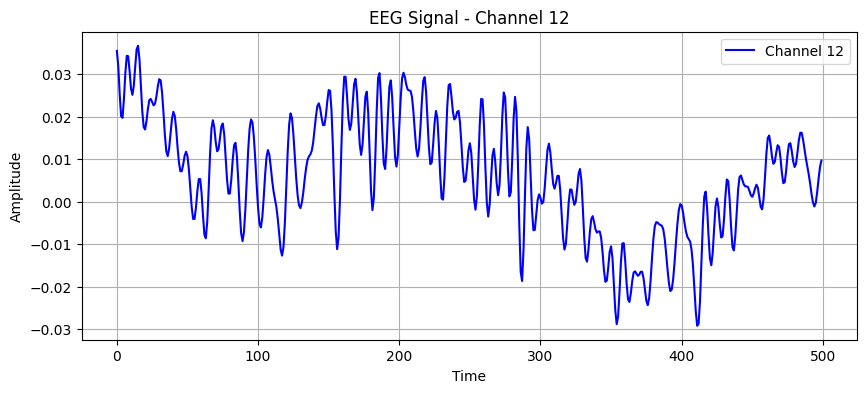

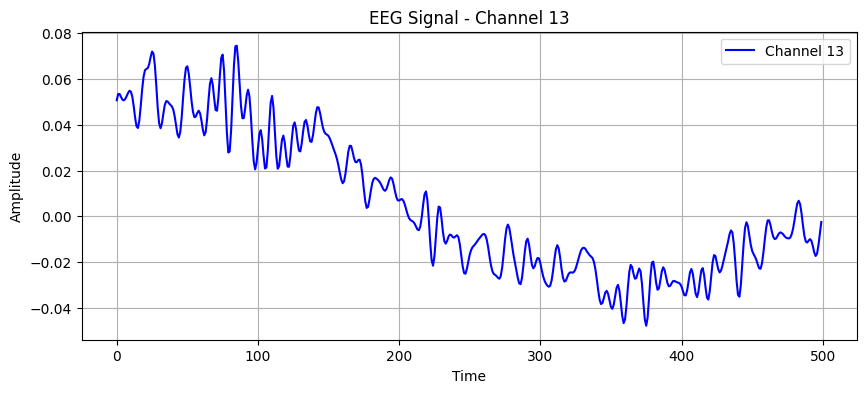

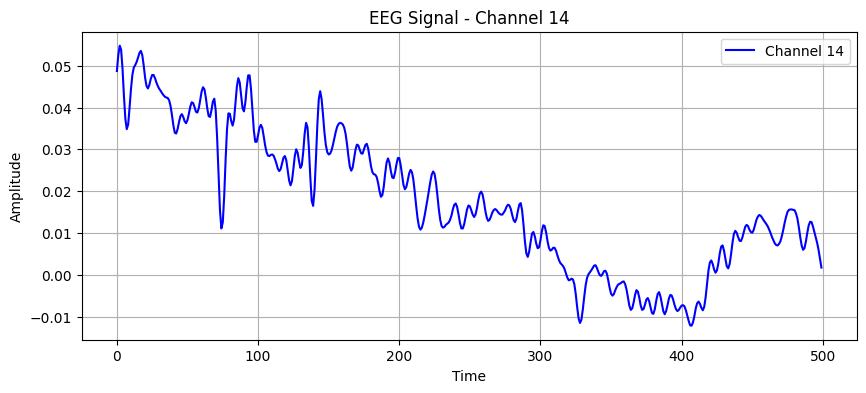

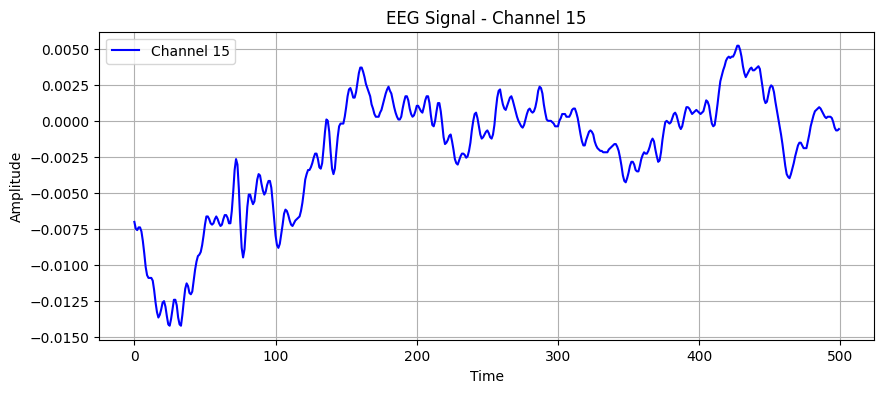

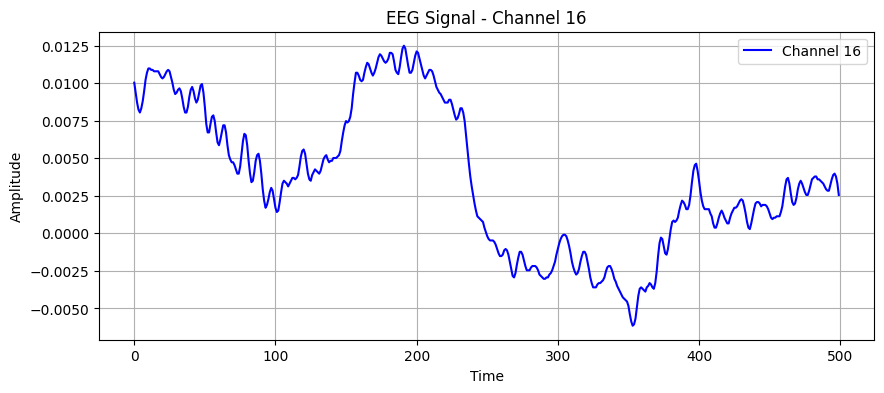

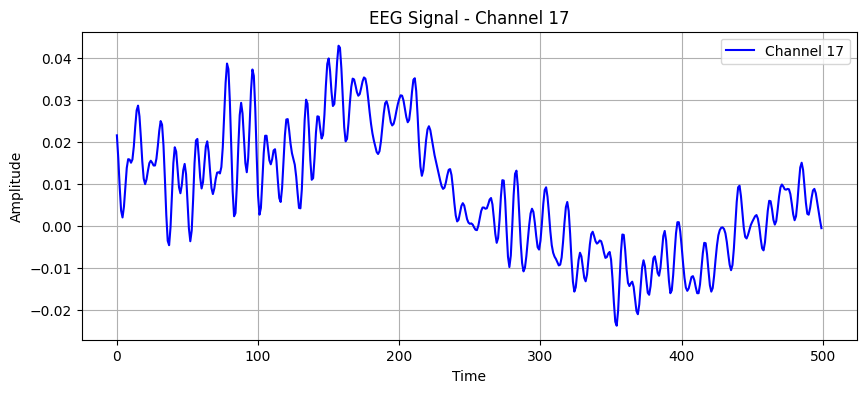

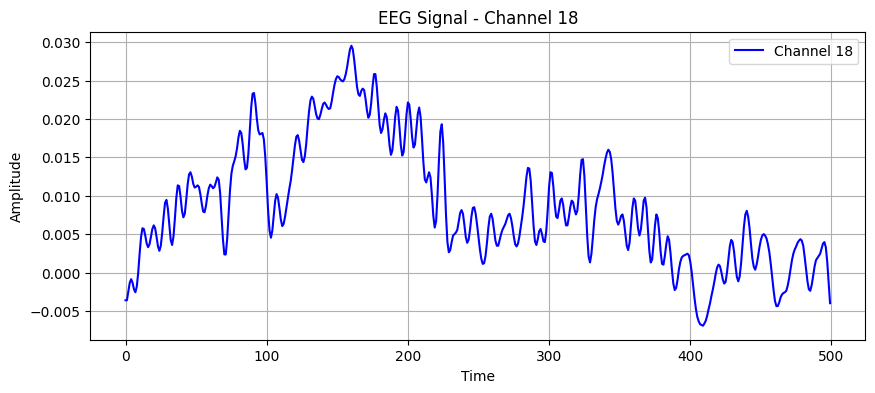

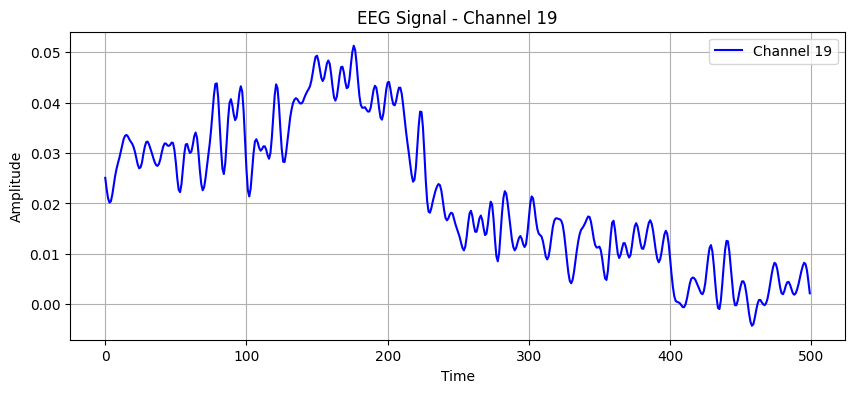

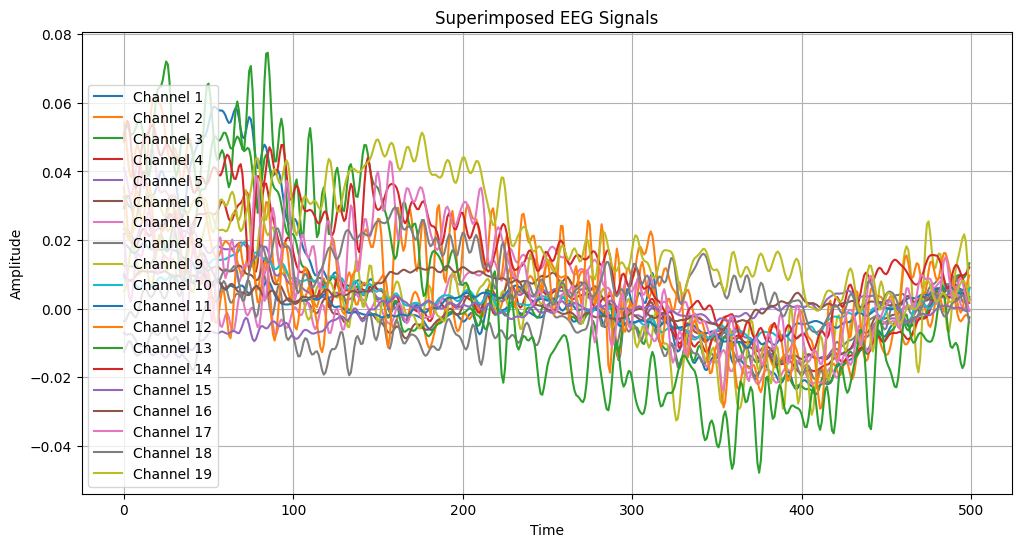

Plots and metrics computation completed.


In [5]:
metrics = {}

for file in selected_files:
    data = np.load(file, allow_pickle=True)
    print(f"Loaded file: {file}, Shape: {data.shape}")

    if data.shape[0] == 19:
        eeg_data = data.T
        time = np.arange(eeg_data.shape[0])
    else:
        raise ValueError(f"Unexpected data shape: {data.shape}. Expected (19, samples).")

    channels = [f"Channel {i+1}" for i in range(eeg_data.shape[1])]
    output_folder = f"plots/{os.path.basename(file).split('.')[0]}"
    os.makedirs(output_folder, exist_ok=True)

    for i, channel in enumerate(channels):
        plt.figure(figsize=(10, 4))
        plt.plot(time, eeg_data[:, i], label=f"{channel}", color='b')
        plt.xlabel("Time")
        plt.ylabel("Amplitude")
        plt.title(f"EEG Signal - {channel}")
        plt.legend()
        plt.grid(True)
        plt.savefig(f"{output_folder}/channel_{i+1}.png")
        plt.show()

    plt.figure(figsize=(12, 6))
    for i, channel in enumerate(channels):
        plt.plot(time, eeg_data[:, i], label=channel)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("Superimposed EEG Signals")
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{output_folder}/superimposed.png")
    plt.show()

    file_metrics = []
    for i, channel in enumerate(channels):
        channel_metrics = compute_metrics(eeg_data[:, i])
        file_metrics.append(channel_metrics)

    metrics[file] = pd.DataFrame(
        file_metrics,
        columns=["Mean", "Zero Crossing Rate", "Range", "Energy", "RMS", "Variance"],
        index=channels
    )
metrics_output_folder = "metrics"
os.makedirs(metrics_output_folder, exist_ok=True)

for file, metric_df in metrics.items():
    output_file = os.path.join(metrics_output_folder, f"{os.path.basename(file).split('.')[0]}_metrics.csv")
    metric_df.to_csv(output_file)

print("Plots and metrics computation completed.")

In [7]:
csv_file = "/content/metrics/5540_metrics.csv"
data = pd.read_csv(csv_file)
print(data)

    Unnamed: 0      Mean  Zero Crossing Rate     Range    Energy       RMS  \
0    Channel 1 -0.001459               0.010  0.040863  0.063749  0.011291   
1    Channel 2  0.001052               0.036  0.015686  0.006588  0.003630   
2    Channel 3 -0.001950               0.030  0.048981  0.046222  0.009615   
3    Channel 4 -0.002324               0.016  0.042908  0.044253  0.009408   
4    Channel 5 -0.000335               0.016  0.012604  0.004677  0.003059   
5    Channel 6  0.002153               0.016  0.013519  0.005369  0.003277   
6    Channel 7  0.003188               0.020  0.021790  0.011716  0.004841   
7    Channel 8 -0.000395               0.020  0.027924  0.015997  0.005656   
8    Channel 9 -0.000518               0.024  0.026825  0.018746  0.006123   
9   Channel 10 -0.001143               0.016  0.022522  0.011542  0.004805   
10  Channel 11  0.002224               0.024  0.020142  0.007545  0.003885   
11  Channel 12  0.002724               0.038  0.029907  0.016700

In [ ]:
csv_file = "/content/metrics/4520_metrics.csv"
data = pd.read_csv(csv_file)
print(data)

    Unnamed: 0      Mean  Zero Crossing Rate     Range    Energy       RMS  \
0    Channel 1  0.001774               0.022  0.050262  0.064473  0.011355   
1    Channel 2  0.001176               0.010  0.054199  0.086605  0.013161   
2    Channel 3  0.000298               0.018  0.029785  0.021892  0.006617   
3    Channel 4  0.001678               0.022  0.034088  0.027782  0.007454   
4    Channel 5  0.000821               0.014  0.033173  0.024420  0.006989   
5    Channel 6  0.000173               0.022  0.047272  0.059728  0.010930   
6    Channel 7 -0.000314               0.018  0.059204  0.108448  0.014727   
7    Channel 8 -0.000818               0.014  0.029907  0.029229  0.007646   
8    Channel 9 -0.000095               0.018  0.023651  0.015565  0.005579   
9   Channel 10  0.000034               0.026  0.009613  0.002581  0.002272   
10  Channel 11 -0.000901               0.018  0.037811  0.036819  0.008581   
11  Channel 12 -0.000828               0.018  0.045349  0.055789

In [ ]:
csv_file = "/content/metrics/3526_metrics.csv"
data = pd.read_csv(csv_file)
print(data)

    Unnamed: 0      Mean  Zero Crossing Rate     Range    Energy       RMS  \
0    Channel 1  0.005111               0.024  0.082339  0.232337  0.021556   
1    Channel 2  0.005014               0.042  0.085179  0.154641  0.017586   
2    Channel 3  0.002223               0.040  0.076188  0.147698  0.017187   
3    Channel 4  0.003141               0.020  0.055082  0.091004  0.013491   
4    Channel 5  0.002329               0.028  0.043441  0.056325  0.010614   
5    Channel 6  0.001783               0.024  0.056313  0.063482  0.011268   
6    Channel 7  0.002245               0.064  0.068427  0.102828  0.014341   
7    Channel 8 -0.007087               0.026  0.031327  0.049978  0.009998   
8    Channel 9  0.001590               0.060  0.067102  0.083972  0.012959   
9   Channel 10  0.002064               0.028  0.028866  0.024787  0.007041   
10  Channel 11  0.001185               0.028  0.030380  0.023191  0.006810   
11  Channel 12  0.006192               0.084  0.065777  0.114813

In [6]:
csv_file = "/content/metrics/1867_metrics.csv"
data = pd.read_csv(csv_file)
print(data)

    Unnamed: 0      Mean  Zero Crossing Rate     Range    Energy       RMS  \
0    Channel 1 -0.000391               0.086  0.044189  0.030931  0.007865   
1    Channel 2 -0.000731               0.066  0.033966  0.019332  0.006218   
2    Channel 3 -0.000596               0.072  0.024170  0.013475  0.005191   
3    Channel 4 -0.000241               0.088  0.020935  0.008697  0.004171   
4    Channel 5 -0.000244               0.046  0.022278  0.010479  0.004578   
5    Channel 6 -0.000418               0.046  0.036499  0.023963  0.006923   
6    Channel 7 -0.002623               0.032  0.056030  0.077793  0.012473   
7    Channel 8 -0.001250               0.060  0.035675  0.032488  0.008061   
8    Channel 9 -0.000737               0.060  0.030060  0.018989  0.006163   
9   Channel 10  0.000029               0.048  0.011566  0.002706  0.002326   
10  Channel 11 -0.000277               0.038  0.026947  0.015782  0.005618   
11  Channel 12 -0.004605               0.022  0.106415  0.339441